# 데이터 전처리 및 정제

In [1]:
#필요 패키지 로드
from konlpy.tag import Okt
okt = Okt()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-11-04 00:23:12.226054: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-04 00:23:12.230727: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: 동적 오브젝트 파일을 열 수 없습니다: 그런 파일이나 디렉터리가 없습니다; LD_LIBRARY_PATH: /usr/lib/nvidia:/usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-11-04 00:23:12.230742: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#데이터 불러오기
data = pd.read_csv('data_8074.csv', encoding = 'utf-8')

In [3]:
#레이블별 개수 확인
data['label'].value_counts()

 0.0    5320
 1.0    1783
-1.0     971
Name: label, dtype: int64

In [4]:
data.head()

,Unnamed: 0,icls_cnts,label
0,0,..<b>경찰</b>과 추격전까지 벌인 40대 남성이 붙잡혔습니다. .. 1시간이 ...,1.0
1,1,순창<b>경찰</b>서 사회적 약자 발굴·지원 앞장 .. 순창<b>경찰</b>서(서...,1.0
2,2,그 생김새가 미심쩍었던 부부는 일주일 넘게 고양이를 데리고 있다 <b>경찰</b>...,1.0
3,3,"수원남부署, 모범<b>경찰</b> 최보라·김세홍 경장에 표창·장려장 수원남부<b>경...",1.0
4,4,조두순에 대한 1대1 전자감독 및 <b>경찰</b>을 통한 24시간 밀착 감독 등...,1.0


In [5]:
#필요 컬럼만 추출
data = data[['label','icls_cnts']]

In [6]:
#데이터 확인
data.head()

,label,icls_cnts
0,1.0,..<b>경찰</b>과 추격전까지 벌인 40대 남성이 붙잡혔습니다. .. 1시간이 ...
1,1.0,순창<b>경찰</b>서 사회적 약자 발굴·지원 앞장 .. 순창<b>경찰</b>서(서...
2,1.0,그 생김새가 미심쩍었던 부부는 일주일 넘게 고양이를 데리고 있다 <b>경찰</b>...
3,1.0,"수원남부署, 모범<b>경찰</b> 최보라·김세홍 경장에 표창·장려장 수원남부<b>경..."
4,1.0,조두순에 대한 1대1 전자감독 및 <b>경찰</b>을 통한 24시간 밀착 감독 등...


In [7]:
#불필요 레이블(999)를 중립 레이블(0)으로 변환
data['label'].fillna(999)
data['label'].replace(999,0,inplace = True)

In [8]:
#데이터 중복 제거
data.drop_duplicates(subset = ['icls_cnts'], inplace = True)
print(len(data))

8074


In [9]:
#훈련 데이터, 테스트 데이터로 데이터 분리
train_data, test_data = train_test_split(data, test_size = 0.25, random_state = 42)
print('훈련용 개수:', len(train_data))
print('테스트용 개수:', len(test_data))

훈련용 개수: 6055
테스트용 개수: 2019


<AxesSubplot: >

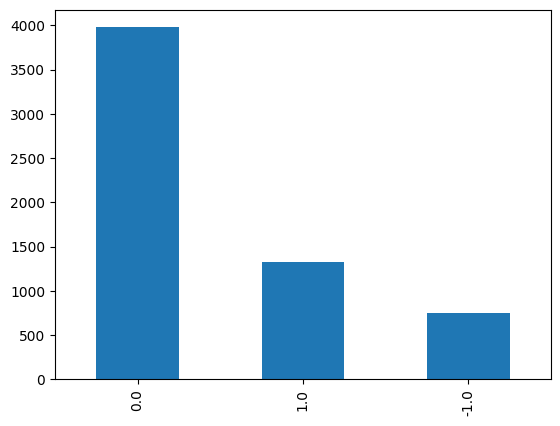

In [10]:
#차트로 레이블별 데이터 개수 확인
train_data['label'].value_counts().plot(kind = 'bar')

In [11]:
#데이터 레이블별 개수 확인
data['label'].value_counts()

 0.0    5320
 1.0    1783
-1.0     971
Name: label, dtype: int64

In [12]:
data['icls_cnts'].dtype

dtype('O')

In [13]:
#null값, 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8074 entries, 0 to 8073
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   label      8074 non-null   float64
 1   icls_cnts  8074 non-null   object 
dtypes: float64(1), object(1)
memory usage: 189.2+ KB


In [14]:
#데이터 타입을 정수형, 문자형으로 변환
data = data.astype({'label': 'int64', 'icls_cnts': 'string'})

# Okt 패키지 활용 토큰화

In [15]:
#한국어 정제 함수 만들기
import re 
def text_cleaning(text):
    hangul = re.compile('[^ㄱ-ㅣ가-힣]+')
    result = hangul.sub('',text)
    return result

In [16]:
#만든 함수 적용
train_data['icls_cnts'] = train_data['icls_cnts'].apply(text_cleaning)
test_data['icls_cnts'] = test_data['icls_cnts'].apply(text_cleaning)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8074 entries, 0 to 8073
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      8074 non-null   int64 
 1   icls_cnts  8074 non-null   string
dtypes: int64(1), string(1)
memory usage: 189.2 KB


In [18]:
#불용어 지정
stopwords = ['도','는','다','의','가','이','은','한','에','하','고','을','를','인','듯','과','와','네','들','듯','지','임','게','만','게임','겜','되','음','면','했','으로','있','로','에서','것','등','해','다고','기','일','년','됐','다는','된','않','할','었','다며','던','습니다','씨','성','지만','수','았','라고','어','명','대','에게','밝혔','까지','대해','그','는데','보','권','아','간','며','해야','안','부터','돼','자','뒤','최근','서']

In [19]:
#okt 패키지를 이용하여 토크나이징
train_data['tokenized'] = train_data['icls_cnts'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item in x if item not in stopwords])
test_data['tokenized'] = test_data['icls_cnts'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item in x if item not in stopwords])

In [20]:
#단어를 리스트로 저장
negative_words = np.hstack(train_data[train_data.label == -1]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)
neutral_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)

In [21]:
#부정 레이블 데이터 중 가장 많이 등장한 500개 단어 확인
negative_words_count = Counter(negative_words)
print(negative_words_count.most_common(500))

[('경찰', 1688), ('수사', 583), ('경찰청', 468), ('경찰관', 453), ('했다', 429), ('경찰서', 382), ('사건', 323), ('혐의', 234), ('하고', 215), ('징계', 194), ('범죄', 189), ('적', 178), ('조사', 172), ('집회', 165), ('소속', 156), ('장', 150), ('관련', 138), ('이다', 133), ('서울', 132), ('경위', 130), ('됐다', 130), ('중', 129), ('의혹', 118), ('검찰', 110), ('당시', 106), ('지난', 105), ('신고', 104), ('대한', 103), ('월', 99), ('사고', 99), ('지방', 94), ('대응', 92), ('따르면', 91), ('인천', 91), ('밝혔다', 85), ('부실', 85), ('위원회', 84), ('했다고', 82), ('음주운전', 82), ('현직', 82), ('개', 76), ('위반', 76), ('입건', 75), ('처벌', 74), ('사', 73), ('현장', 72), ('국민', 71), ('확인', 70), ('경', 70), ('의원', 69), ('폭행', 67), ('내', 66), ('공무원', 66), ('피해자', 65), ('피해', 65), ('발생', 65), ('감찰', 64), ('광주', 63), ('사실', 62), ('직위해제', 61), ('여성', 61), ('전', 60), ('출동', 60), ('위해', 60), ('단속', 58), ('있다', 57), ('조치', 57), ('담당', 57), ('팀', 57), ('건', 57), ('이나', 56), ('상', 54), ('과정', 54), ('에도', 54), ('받은', 53), ('논란', 53), ('보호', 52), ('했습니다', 51), ('경찰청장', 51), ('해임', 51), ('검거'

In [22]:
#긍정 레이블 데이터 중 가장 많이 등장한 500개 단어 확인
positive_words_count = Counter(positive_words)
print(positive_words_count.most_common(500))

[('경찰', 1924), ('경찰서', 1262), ('했다', 826), ('범죄', 534), ('경찰청', 517), ('하고', 498), ('예방', 437), ('장', 366), ('적', 351), ('수사', 299), ('안전', 293), ('신고', 287), ('위해', 287), ('범죄예방', 278), ('및', 252), ('경찰관', 245), ('혐의', 245), ('밝혔다', 242), ('보이스피싱', 240), ('지역', 234), ('활동', 228), ('이다', 215), ('지난', 209), ('피해', 202), ('사고', 201), ('검거', 194), ('위', 189), ('캠페인', 187), ('교통', 183), ('감사', 182), ('중', 177), ('직원', 172), ('됐다', 169), ('여성', 160), ('날', 157), ('내', 157), ('보호', 156), ('조사', 154), ('서장', 154), ('센터', 153), ('여', 153), ('청소년', 152), ('상', 150), ('했다고', 148), ('현장', 148), ('원', 147), ('서울', 142), ('위반', 141), ('대응', 140), ('체포', 140), ('팀', 135), ('통해', 134), ('발생', 131), ('함께', 129), ('있다', 128), ('단속', 128), ('주민', 127), ('따르면', 127), ('시민', 124), ('분', 123), ('실시', 121), ('교통사고', 120), ('점검', 118), ('제', 117), ('불법', 117), ('개', 117), ('치안', 116), ('대한', 115), ('운영', 115), ('전달', 114), ('기관', 113), ('사건', 112), ('식', 111), ('순찰', 111), ('말', 110), ('출동', 110), ('시', 109)

In [23]:
#중립 레이블 데이터 중 가장 많이 등장한 500개 단어 확인
neutral_words_count = Counter(neutral_words) 
print(neutral_words_count.most_common(500))

[('경찰', 6256), ('했다', 2154), ('수사', 2005), ('경찰서', 1419), ('하고', 1264), ('경찰청', 1089), ('적', 933), ('범죄', 925), ('혐의', 871), ('사고', 773), ('이다', 771), ('조사', 751), ('사건', 704), ('중', 672), ('장', 638), ('신고', 559), ('위해', 538), ('밝혔다', 521), ('지난', 493), ('있다', 483), ('검찰', 480), ('됐다', 471), ('경찰관', 471), ('관련', 465), ('위반', 450), ('지역', 440), ('및', 440), ('투기', 431), ('상', 416), ('코로나', 416), ('따르면', 410), ('내', 406), ('원', 395), ('서울', 392), ('대한', 388), ('의혹', 384), ('분', 381), ('확인', 375), ('했다고', 363), ('예방', 362), ('월', 359), ('직원', 359), ('전', 358), ('위', 357), ('발생', 356), ('현장', 348), ('제', 345), ('사', 341), ('기관', 341), ('안전', 340), ('시', 336), ('시위', 335), ('여', 325), ('개', 322), ('날', 315), ('자치', 315), ('피해', 314), ('발견', 299), ('기자', 299), ('남성', 298), ('통해', 292), ('공무원', 287), ('집회', 285), ('조', 284), ('여성', 283), ('특별', 278), ('차량', 271), ('경', 270), ('말', 269), ('범죄예방', 267), ('팀', 263), ('사실', 250), ('예정', 249), ('부동산', 245), ('함께', 241), ('소방', 238), ('관', 236), ('결

In [24]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test = test_data['tokenized'].values 
y_test = test_data['label'].values

In [25]:
#정수로 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [26]:
# 등장 횟수가 1회인 단어들은 배제
threshold = 2 
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold 보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0 #등장 빈도수가 threshold보다 작은 단어의 등장 빈도수 총합

#단어와 빈도수의 쌍을 key와 value로 받기
for key,value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    #단어 등장 빈도수가 threshold 보다 작으면:
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합의 크기:', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold -1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt / total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq / total_freq)*100)

단어 집합의 크기: 30017
등장 빈도가 1번 이하인 희귀 단어의 수: 14974
단어 집합에서 희귀 단어의 비율: 49.8850651297598
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.937905199079296


In [27]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기:', vocab_size)

단어 집합의 크기: 15045


In [28]:
#단어 집합의 크기보다 큰 숫자가 부여된 단어들을 oov로 변환
#토크나이저가 텍스트 시퀀스를 숫자 시퀀스로 변환해줌
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [29]:
print(X_train[:3])

[[634, 1040, 10656, 602, 49, 1, 74, 2, 56, 249, 126, 184, 166, 211, 634, 1040, 7040, 602, 1, 4889, 285, 300, 74, 23, 2, 33, 74, 133, 1, 103, 49, 1771, 234, 8457, 4104, 667, 10657, 1197, 475, 4460, 2, 2570, 702, 6097, 848, 280, 243, 137, 1026, 6098, 301, 95, 387, 169, 14], [2571, 342, 153, 3144, 10658, 10659, 1118, 4890, 1, 153, 875, 2572, 1, 1882, 648, 160, 1, 1564, 41, 973, 221, 2087, 4891, 1670, 4105, 160, 153, 2717, 51, 4892, 35, 930, 15, 149, 589, 4893, 1, 3145, 1, 15, 7, 1345, 5, 54, 974, 834, 387, 14], [2854, 8458, 1452, 197, 1, 294, 656, 7041, 3824, 1, 58, 7042, 10660, 7041, 656, 10661, 133, 5429, 1413, 4893, 1, 369, 1041, 7041, 3824, 10662, 7042, 10660, 1, 2573, 7041, 3824, 10662, 7042, 343, 8459, 419, 2573, 282, 156, 931, 1821, 772, 516, 156, 635, 624, 5430, 476, 1821, 4, 1346, 1490, 1, 369, 1041, 486, 6099, 3342, 3557, 14]]


In [30]:
print(X_test[:3])

[[1267, 350, 67, 1, 2, 1162, 4657, 210, 2, 350, 917, 790, 3178, 1, 67, 3764, 7948, 11, 523, 6443, 16, 127, 44, 504, 1, 1, 2977, 1, 23, 6931, 4, 1366, 303, 174, 1, 1038, 1, 2006, 73, 2134, 2, 559, 1, 397, 1, 920, 7675, 2, 1771, 13818, 5044, 1], [310, 1102, 3104, 560, 969, 7901, 109, 662, 78, 576, 900, 7455, 2, 13522, 422, 109, 11470, 905, 14, 10651, 698, 13, 44, 211, 3518, 69, 12, 3408, 4930, 616, 847, 32, 1573, 467, 3, 428, 560, 98, 625, 847, 420, 420, 616, 550, 771, 7, 847, 1, 453, 3401, 425, 1883, 3], [543, 5741, 1952, 451, 1, 4235, 763, 3961, 8511, 18, 212, 87, 11, 389, 3704, 252, 7183, 405, 2320, 300, 958, 850, 337, 267, 1340, 4492, 1316, 1, 3777, 2693, 2836, 10, 28, 2512, 1, 3287, 790, 7, 7544, 5741, 2036, 1, 2798, 5420, 1, 11441, 1, 2, 395, 3]]


# 패딩(padding)

뉴스의 최대 길이: 83
뉴스의 평균 길이: 50.08191577208918


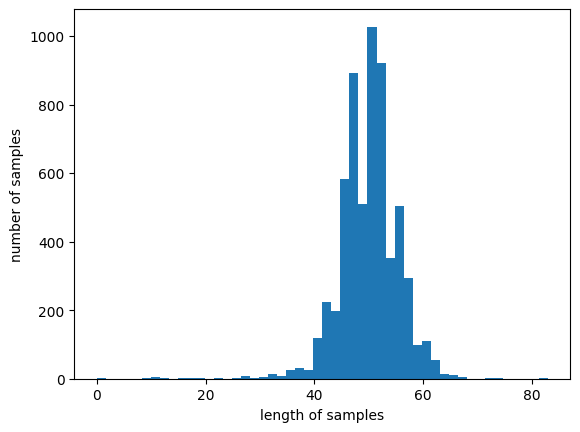

In [31]:
#최대 길이 확인
print('뉴스의 최대 길이:', max(len(review)for review in X_train))
print('뉴스의 평균 길이:', sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [32]:
#샘플의 길이 중 최대 길이 이하인 샘플의 비율 확인하기
def below_threshold_len(max_len, nested_list):
    count = 0 
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의비율: %s'%(max_len, (count/len(nested_list))*100))

In [33]:
#만약 68로 패딩할 경우 몇 개의 샘플들을 보전할 수 있는지 확인하기
max_len = 68
below_threshold_len(max_len,X_train)

전체 샘플 중 길이가 68 이하인 샘플의비율: 99.95045417010735


In [34]:
#훈련용 리뷰를 60으로 패딩
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# 모델 적용

In [35]:
#모델 적용을 위한 패키지 로드
import re
import os
from tensorflow.keras.layers import Embedding,Dense,LSTM,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
import h5py
import numpy as np

In [71]:
#모델 적용
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size = 64, validation_split = 0.1)

Epoch 1/10
86/86 [==============================] - 9s 73ms/step - loss: -0.1897 - acc: 0.6544 - val_loss: -1.0414 - val_acc: 0.6832
Epoch 2/10
86/86 [==============================] - 5s 59ms/step - loss: -1.8616 - acc: 0.6787 - val_loss: -2.6119 - val_acc: 0.7178
Epoch 3/10
86/86 [==============================] - 5s 60ms/step - loss: -3.4240 - acc: 0.7401 - val_loss: -3.5841 - val_acc: 0.7013
Epoch 4/10
86/86 [==============================] - 5s 59ms/step - loss: -5.7525 - acc: 0.7622 - val_loss: -4.8205 - val_acc: 0.7063
Epoch 5/10
86/86 [==============================] - 5s 59ms/step - loss: -8.1559 - acc: 0.7915 - val_loss: -5.5592 - val_acc: 0.6980
Epoch 6/10
86/86 [==============================] - 5s 59ms/step - loss: -9.9579 - acc: 0.8075 - val_loss: -6.9632 - val_acc: 0.7013
Epoch 7/10
86/86 [==============================] - 5s 59ms/step - loss: -12.8499 - acc: 0.8053 - val_loss: -8.4589 - val_acc: 0.6947
Epoch 8/10
86/86 [==============================] - 5s 60ms/step - l

In [72]:
#모델 평가
print("테스트 정확도:%4f"%(model.evaluate(X_test, y_test)[1]))

64/64 [==============================] - 1s 14ms/step - loss: -7.5062 - acc: 0.6954
테스트 정확도:0.695394


In [73]:
#예측 함수
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ 가-힣]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(model.predict(pad_new))
    if(score > 0.5):
        print("{:2f}% 확률로 긍정 뉴스입니다.".format(score*100))
    else:
        print("{:2f}% 확률로 부정 뉴스입니다.".format((1-score)*100))
        

In [74]:
#다른 문장으로 예측
sentiment_predict('제주 현직 경찰관이 음주운전 사고를 내 입건됐다.제주서부경찰서는 도로교통법 위반(음주운전) 혐의로 제주시 모 지구대 소속 A 경사를 입건했다고 17일 밝혔다.A 경사는 지난 14일 밤 10시29분쯤 제주시 연동의 한 호텔 인근 도로에서 술을 마시고 차를 몰다 가드레일을 들이받은 혐의를 받고 있다.이 사고로 다행히 다친 사람은 없는 것으로 전해졌다.사고 당시 A 경사의 혈중 알코올 농도는 면허 취소 수준 인 0.08%를 넘은 것으로 파악됐으며 경찰은 정확한 사건 경위를 조사하고 있다.')

1/1 [==============================] - 1s 546ms/step
100.000000% 확률로 부정 뉴스입니다.


In [75]:
sentiment_predict('대구 <b>경찰</b>관, 수배자 검거하러 용인 갔다가 음주운전 <b>사고</b> 새벽에 동료 태운 채 터널 벽 충돌<b>사고</b> ..대구 지역 <b>경찰</b>관이 수배자를 찾으러 간 경기도에서 음주운전 <b>사고</b>를 냈다. ..이 <b>사고</b>로 A 경사와 동료 B 경장이 다쳐 병원에서 치료를 받고 있다. ..<b>사고</b> ..두 사람은 수배자를 검거하러 갔다가 밤에 숙소에서 나와 술을 마신 것으로 <b>경찰</b>은 보고 있다. ..')

1/1 [==============================] - 0s 40ms/step
100.000000% 확률로 부정 뉴스입니다.
